How is the ucu term functioning? 
How does dic function in absence of winds?

    changeset:   2315:846722adff8e
    /data/tjarniko/MEOPAR/SS-run-sets/SalishSea/nemo3.6/tereza/SKOG_diag_chlr/3ts_test
    SKOG_3ts.yaml

       cn_exp      = "SalishSea"  ! experience name
       nn_it000    =      3520801    ! first time step
       nn_itend    =      3520891    ! last time step (std 1 day = 2160 re: rn_rdt=40 in &namdom)
       nn_date0    =  20180501    ! date at nn_it000 (format yyyymmdd) ie START OF THIS SEGMENT
                                  ! used to adjust tides to run date (regardless of restart control)
       nn_leapy    =       1      ! Leap year calendar (1) or not (0)


In [36]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [37]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [38]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import cmocean as cm
import glob
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ/')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import VIZ_plots as VP

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [39]:
reload(cs)


<module 'CCCma_stations' from '/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src/CCCma_stations.py'>

In [40]:
print(cs.STATIONS['JDFB']['x'])
tstat = list(cs.STATIONS.keys())

0


In [41]:
# mar22_SKOG90ts/
# mar22_SKOG90ts_nowind/
tdir = '/data/tjarniko/results/01apr19_90ts/'
tdir_wr = '/data/tjarniko/results/09apr19_90ts_newrfact2/'
# tdir2 = '/data/tjarniko/results/mar22_SKOG90ts_nowind/'
tnc_c = 'SalishSea*_carp_T_*.nc'
tnc_g = 'SalishSea*_grid_T_*.nc'
tnc_p = 'SalishSea*_ptrc_T_*.nc'
tpath_c = glob.glob(tdir+tnc_c)
tpath_g = glob.glob(tdir+tnc_g)
tpath_p = glob.glob(tdir+tnc_p)
tpath_c0 = tpath_c[0]
tpath_g0 = tpath_g[0]
tpath_p0 = tpath_p[0]
nc_c = nc.Dataset(tpath_c0)
nc_g = nc.Dataset(tpath_g0)
nc_p = nc.Dataset(tpath_p0)
#print(ts)

tnc_c_wr = 'SalishSea*_carp_T_*.nc'
tnc_g_wr = 'SalishSea*_grid_T_*.nc'
tnc_p_wr = 'SalishSea*_ptrc_T_*.nc'
tpath_c_wr = glob.glob(tdir_wr+tnc_c_wr)
tpath_g_wr = glob.glob(tdir_wr+tnc_g_wr)
tpath_p_wr = glob.glob(tdir_wr+tnc_p_wr)
tpath_c_wr0 = tpath_c_wr[0]
tpath_g_wr0 = tpath_g_wr[0]
tpath_p_wr0 = tpath_p_wr[0]
nc_c_wr = nc.Dataset(tpath_c_wr0)
nc_g_wr = nc.Dataset(tpath_g_wr0)
nc_p_wr = nc.Dataset(tpath_p_wr0)


In [42]:
dic = nc_c.variables['dissolved_inorganic_carbon']
udic = nc_c.variables['uptake_DIC']
uuc = nc_c.variables['uptake_UC']
flco2 = nc_c.variables['co2_flux_mmol_m2_s']
ta = nc_c.variables['total_alkalinity']


nit = nc_p.variables['nitrate']
diat = nc_p.variables['diatoms']
flag = nc_p.variables['flagellates']
cili = nc_p.variables['ciliates']

temp = nc_g.variables['votemper']
sal = nc_g.variables['vosaline']



In [43]:
print(nc_c_wr)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_10ts_20180501_20180501
    description: auxilary variables
    title: auxilary variables
    Conventions: CF-1.6
    timeStamp: 2019-Apr-09 18:34:59 GMT
    uuid: abd2a12b-5ea8-47ab-bc6e-cfa800c27ba5
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), deptht(40), time_counter(9)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_lon(y,x,nvertex), float32 bounds_lat(y,x,nvertex), float32 area(y,x), float32 deptht(deptht), float32 deptht_bounds(deptht,axis_nbounds), float32 PAR(time_counter,deptht,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 sigma_theta(time_counter,deptht,y,x), float32 e3t(time_counter,deptht,y,x), float32 dissolved_inorganic_carbon(time_counter,deptht,y,x), float

In [44]:
print(nc_c_wr)
dic_wr = nc_c_wr.variables['dissolved_inorganic_carbon']
# udic = nc_c_wr.variables['uptake_DIC']
# uuc = nc_c_wr.variables['uptake_UC']
flco2_wr = nc_c_wr.variables['co2_flux_mmol_m2_s']
ta_wr = nc_c_wr.variables['total_alkalinity']


nit_wr = nc_p_wr.variables['nitrate']
diat_wr = nc_p_wr.variables['diatoms']
flag_wr = nc_p_wr.variables['flagellates']
cili_wr = nc_p_wr.variables['ciliates']

temp_wr = nc_g_wr.variables['votemper']
sal_wr = nc_g_wr.variables['vosaline']

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_10ts_20180501_20180501
    description: auxilary variables
    title: auxilary variables
    Conventions: CF-1.6
    timeStamp: 2019-Apr-09 18:34:59 GMT
    uuid: abd2a12b-5ea8-47ab-bc6e-cfa800c27ba5
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), deptht(40), time_counter(9)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_lon(y,x,nvertex), float32 bounds_lat(y,x,nvertex), float32 area(y,x), float32 deptht(deptht), float32 deptht_bounds(deptht,axis_nbounds), float32 PAR(time_counter,deptht,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 sigma_theta(time_counter,deptht,y,x), float32 e3t(time_counter,deptht,y,x), float32 dissolved_inorganic_carbon(time_counter,deptht,y,x), float

### Nitrate vs Nitrate-at-start

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


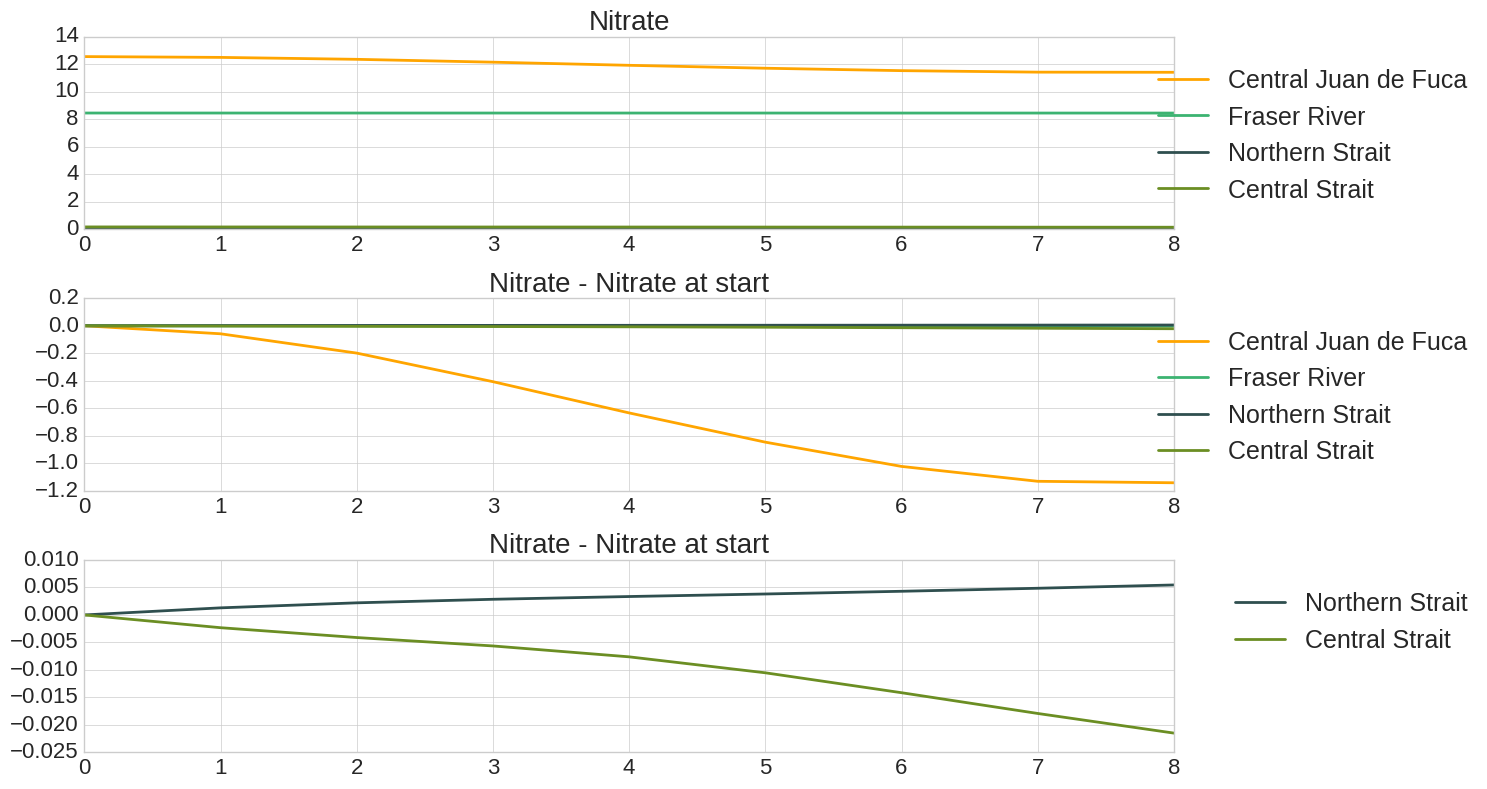

In [45]:

fig = plt.figure(figsize=(12,8))

for i in range(1,4):
    ax = fig.add_subplot(3,1,i)
    plt.xlim([0,93])

    if i == 1:
        print('')
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tnit = nit[:,1,ty+10,tx+10]
                ax.plot(tnit,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 18)
            plt.title('Nitrate', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
    
    if i == 2:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tnitstart = nit[0,1,ty+10,tx+10]
                tnit = nit[:,1,ty+10,tx+10]
                ax.plot(tnit-tnitstart,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 18)
            plt.title('Nitrate - Nitrate at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            
    if i == 3:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tnitstart = nit[0,1,ty+10,tx+10]
                tnit = nit[:,1,ty+10,tx+10]
                ax.plot(tnit-tnitstart,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            #plt.ylim([-0.05,0.05])
            plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 18)
            plt.title('Nitrate - Nitrate at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## ciliates, flagellates, diatoms

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


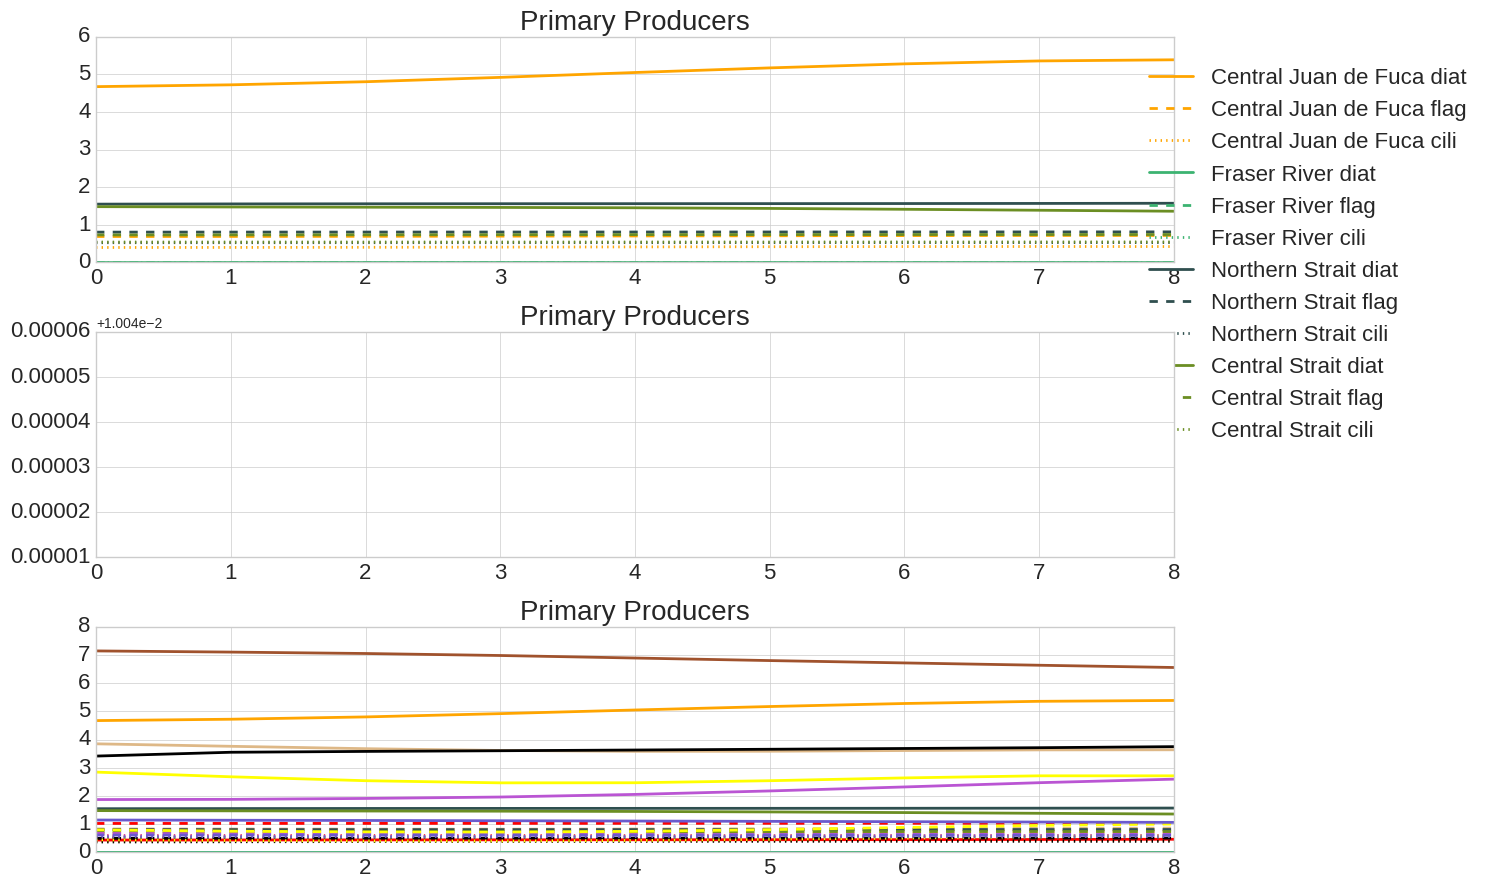

In [46]:

fig = plt.figure(figsize=(12,9))

for i in range(1,4):
    ax = fig.add_subplot(3,1,i)
    plt.xlim([0,93])

    if i == 1:
        print('')
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tdiat = diat[:,1,ty+10,tx+10]
                tcili = cili[:,1,ty+10,tx+10]
                tflag = flag[:,1,ty+10,tx+10]
                ax.plot(tdiat,col,label=lab+' diat',linewidth=2, linestyle='-')
                ax.plot(tflag,col,label=lab+' flag',linewidth=2, linestyle='--')
                ax.plot(tcili,col,label=lab+' cili',linewidth=2, linestyle=':')
            plt.xlim([0,8])
            plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('Primary Producers', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
    
    if i == 2:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tdiat = diat[:,1,ty+10,tx+10]
                tcili = cili[:,1,ty+10,tx+10]
                tflag = flag[:,1,ty+10,tx+10]
                ax.plot(tdiat,col,label=lab+' diat',linewidth=2, linestyle='-')
                ax.plot(tflag,col,label=lab+' flag',linewidth=2, linestyle='--')
                ax.plot(tcili,col,label=lab+' cili',linewidth=2, linestyle=':')
            plt.xlim([0,8])
            plt.ylim([0.01005,0.0101])
            #plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('Primary Producers', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            
    if i == 3:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            #if (i == 6) | (i == 7) | (i == 1) | (i == 4):
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tdiat = diat[:,1,ty+10,tx+10]
            tcili = cili[:,1,ty+10,tx+10]
            tflag = flag[:,1,ty+10,tx+10]

            tdiat_s = diat[0,1,ty+10,tx+10]
            tcili_s = cili[0,1,ty+10,tx+10]
            tflag_s = flag[0,1,ty+10,tx+10]

            ax.plot(tdiat,col,label=lab+' diat',linewidth=2, linestyle='-')
            ax.plot(tflag,col,label=lab+' flag',linewidth=2, linestyle='--')
            ax.plot(tcili,col,label=lab+' cili',linewidth=2, linestyle=':')
            plt.xlim([0,8])
            #plt.ylim([0.01005,0.0101])
            #plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('Primary Producers', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Because the diatoms/nitrate looked weird (low biomass, high nitrate), I checked whether I had properly restarted --no

In [47]:
# #tmx = np.max(diat_end)
# diat_start = diat[0,1,:,:]
# diat_end = diat[8,1,:,:]
# tmx = 0.02
# VP.two_panel_plot(diat_start,diat_end,'Diat, timestep 0','Diat, timestep 8',\
#                   cm.cm.deep,12,12,0,tmx,0,tmx,'','','')

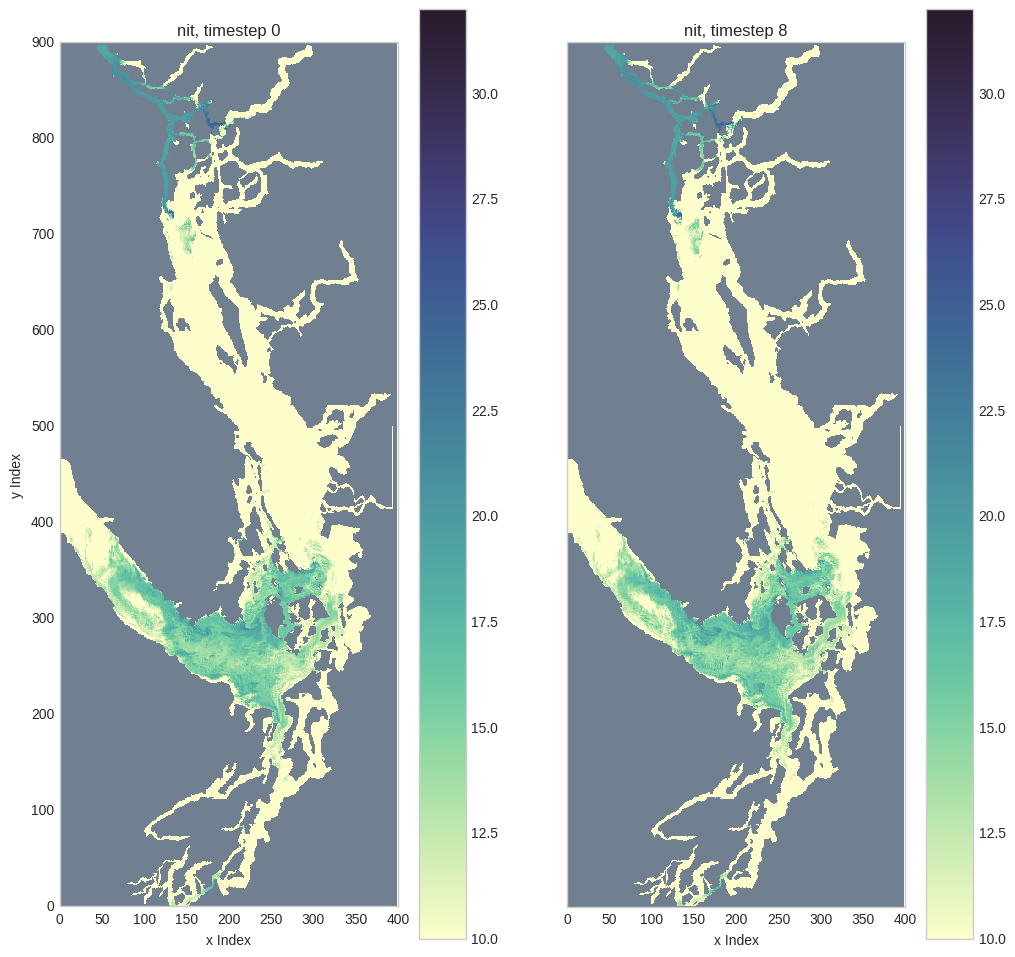

In [48]:
#tmx = np.max(diat_end)
nit_start = nit[0,1,:,:]
nit_end = nit[8,1,:,:]
tmx = 32
VP.two_panel_plot(nit_start,nit_end,'nit, timestep 0','nit, timestep 8',\
                  cm.cm.deep,12,12,10,tmx,10,tmx,'','','')

## DIC / DIC-orig

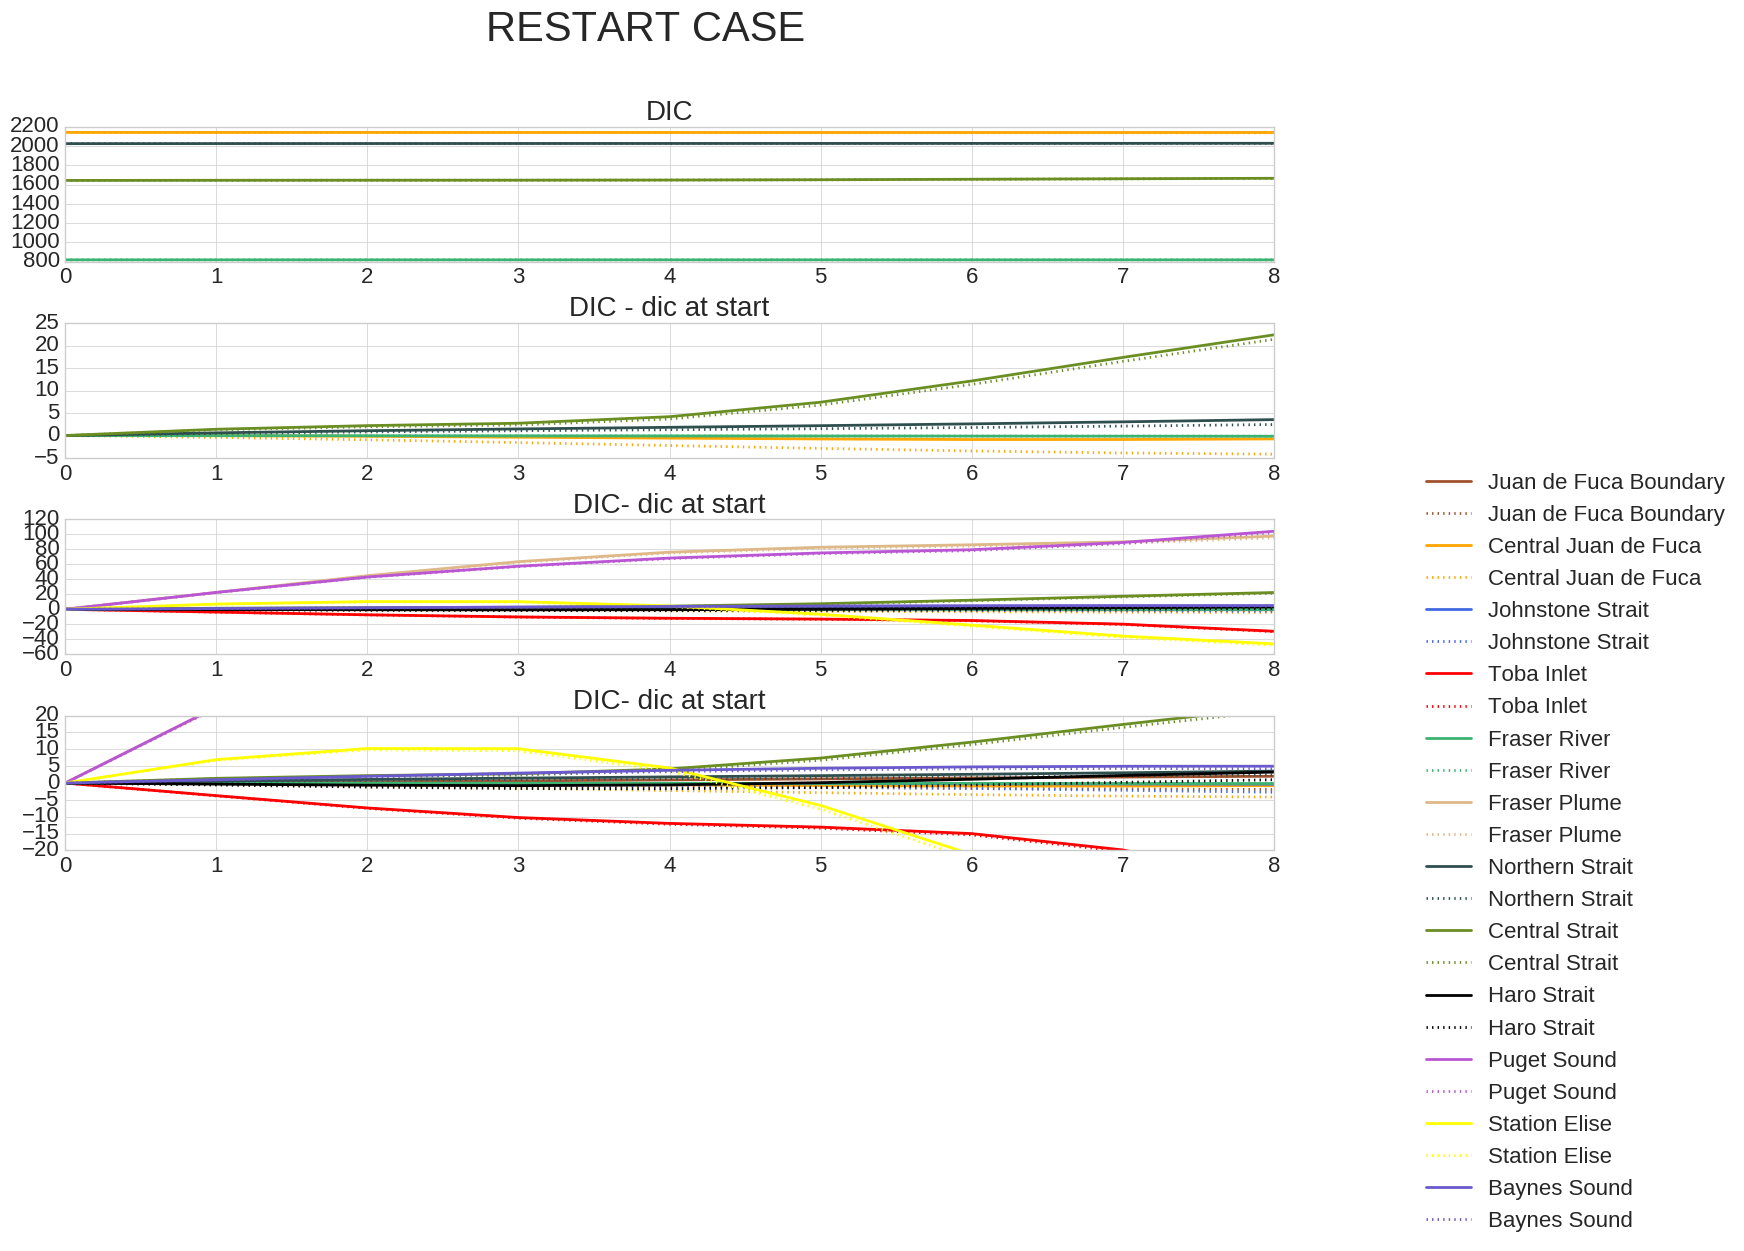

In [49]:
fig = plt.figure(figsize=(13,9))

nop = 4
for i in range(1,nop+1):
    ax = fig.add_subplot(nop,1,i)

    if i == 1:
        print('')
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tdic = dic[:,1,ty+10,tx+10]
                tdic_wr = dic_wr[:,1,ty+10,tx+10]
                ax.plot(tdic,col,label=lab,linewidth=2, linestyle='-')
                ax.plot(tdic_wr,col,label=lab,linewidth=2, linestyle=':')
            plt.xlim([0,8])
#             plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('DIC', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
    
    if i == 2:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tdic =  dic[:,1,ty+10,tx+10]
                tdic_wr = dic_wr[:,1,ty+10,tx+10]
                tdic_s = dic[0,1,ty+10,tx+10]
                tdic_s_wr = dic_wr[0,1,ty+10,tx+10]
                ax.plot(tdic-tdic_s,col,label=lab,linewidth=2, linestyle='-')
                ax.plot(tdic_wr-tdic_s_wr,col,label=lab,linewidth=2, linestyle=':')
            plt.xlim([0,8])
            #plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('DIC - dic at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            
    if i == 3:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            #if (i == 6) | (i == 7) | (i == 1) | (i == 4):
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tdic =  dic[:,1,ty+10,tx+10]
            tdic_wr = dic_wr[:,1,ty+10,tx+10]
            tdic_s = dic[0,1,ty+10,tx+10]
            tdic_s_wr = dic_wr[0,1,ty+10,tx+10]
            ax.plot(tdic-tdic_s,col,label=lab,linewidth=2, linestyle='-')
            ax.plot(tdic_wr-tdic_s_wr,col,label=lab,linewidth=2, linestyle=':')
            plt.xlim([0,8])
            #plt.ylim([0.01005,0.0101])
            #plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('DIC- dic at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            
    if i == 4:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            #if (i == 6) | (i == 7) | (i == 1) | (i == 4):
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tdic =  dic[:,1,ty+10,tx+10]
            tdic_wr = dic_wr[:,1,ty+10,tx+10]
            tdic_s = dic[0,1,ty+10,tx+10]
            tdic_s_wr = dic_wr[0,1,ty+10,tx+10]
            ax.plot(tdic-tdic_s,col,label=lab,linewidth=2, linestyle='-')
            ax.plot(tdic_wr-tdic_s_wr,col,label=lab,linewidth=2, linestyle=':')
            plt.xlim([0,8])
            plt.ylim([-20,20])
            #plt.ylim([0.01005,0.0101])
            plt.legend(bbox_to_anchor=(1.39, 2.95), fontsize = 16)
            plt.title('DIC- dic at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

fig.suptitle('RESTART CASE',fontsize = 30)
fig.tight_layout()
plt.subplots_adjust(top=0.85)
  # otherwise the right y-label is slightly clipped
plt.show()


[ 0.          0.37988281  0.77514648  1.1953125   1.64453125  2.09765625
  2.54492188  2.99560547  3.39892578]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   6.10351562e-05   6.10351562e-05
   6.10351562e-05]
[ 0.          0.13208008  0.26525879  0.39929199  0.53442383  0.67089844
  0.8092041   0.94958496  1.09265137]
[ 0.          0.13134766  0.26257324  0.39294434  0.52185059  0.64782715
  0.77001953  0.88745117  1.00048828]


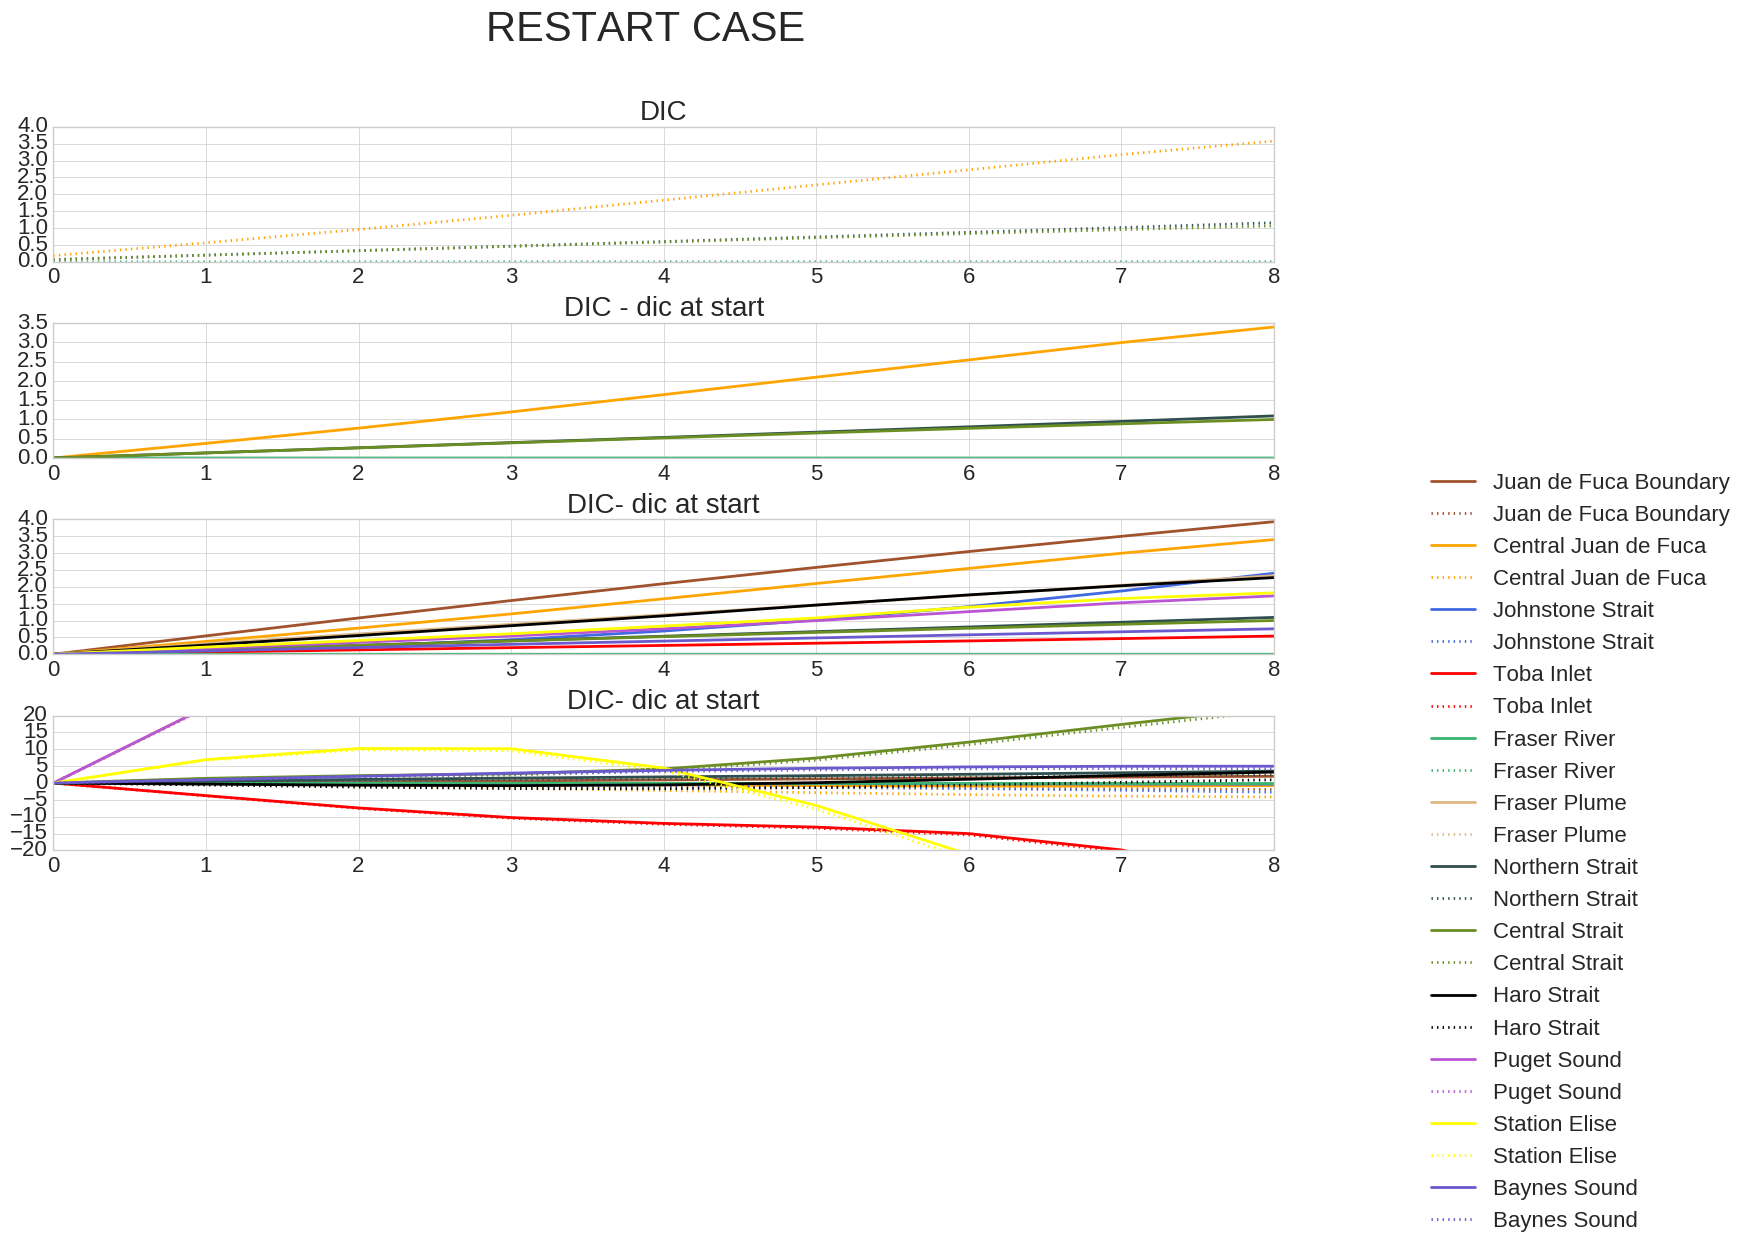

In [50]:
fig = plt.figure(figsize=(13,9))

nop = 4
for i in range(1,nop+1):
    ax = fig.add_subplot(nop,1,i)

    if i == 1:
        print('')
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tdic = dic[:,1,ty+10,tx+10]
                tdic_wr = dic_wr[:,1,ty+10,tx+10]
                ##ax.plot(tdic,col,label=lab,linewidth=2, linestyle='-')
                ax.plot(tdic-tdic_wr,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
#             plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('DIC (no rfact) - DIC(rfact))', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
    
    if i == 2:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tdic =  dic[:,1,ty+10,tx+10]
                tdic_wr = dic_wr[:,1,ty+10,tx+10]
                tdic_s = dic[0,1,ty+10,tx+10]
                tdic_s_wr = dic_wr[0,1,ty+10,tx+10]
                print((tdic-tdic_s)-(tdic_wr-tdic_s_wr))
                ax.plot((tdic-tdic_s)-(tdic_wr-tdic_s_wr),col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            #plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('DIC - dic at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            
    if i == 3:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            #if (i == 6) | (i == 7) | (i == 1) | (i == 4):
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tdic =  dic[:,1,ty+10,tx+10]
            tdic_wr = dic_wr[:,1,ty+10,tx+10]
            tdic_s = dic[0,1,ty+10,tx+10]
            tdic_s_wr = dic_wr[0,1,ty+10,tx+10]
            ax.plot((tdic-tdic_s)-(tdic_wr-tdic_s_wr),col,label=lab,linewidth=2, linestyle='-')
            #ax.plot(,col,label=lab,linewidth=2, linestyle=':')
            plt.xlim([0,8])
            #plt.ylim([0.01005,0.0101])
            #plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('DIC- dic at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            
    if i == 4:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            #if (i == 6) | (i == 7) | (i == 1) | (i == 4):
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tdic =  dic[:,1,ty+10,tx+10]
            tdic_wr = dic_wr[:,1,ty+10,tx+10]
            tdic_s = dic[0,1,ty+10,tx+10]
            tdic_s_wr = dic_wr[0,1,ty+10,tx+10]
            ax.plot(tdic-tdic_s,col,label=lab,linewidth=2, linestyle='-')
            ax.plot(tdic_wr-tdic_s_wr,col,label=lab,linewidth=2, linestyle=':')
            plt.xlim([0,8])
            plt.ylim([-20,20])
            #plt.ylim([0.01005,0.0101])
            plt.legend(bbox_to_anchor=(1.39, 2.95), fontsize = 16)
            plt.title('DIC- dic at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

fig.suptitle('RESTART CASE',fontsize = 30)
fig.tight_layout()
plt.subplots_adjust(top=0.85)
  # otherwise the right y-label is slightly clipped
plt.show()

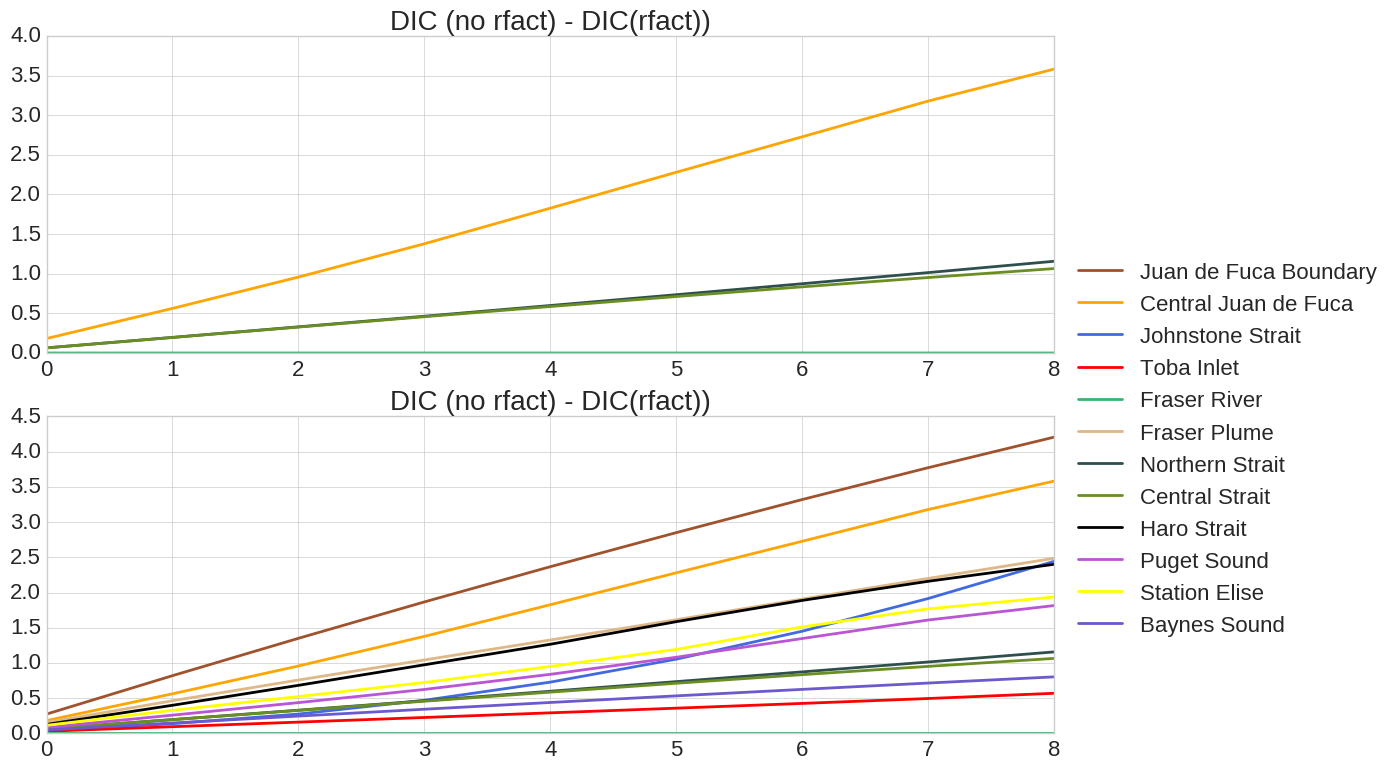

In [64]:
fig = plt.figure(figsize=(13,9))

nop = 2
for i in range(1,nop+1):
    ax = fig.add_subplot(nop,1,i)

    if i == 1:
        print('')
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tdic = dic[:,1,ty+10,tx+10]
                tdic_wr = dic_wr[:,1,ty+10,tx+10]
                ##ax.plot(tdic,col,label=lab,linewidth=2, linestyle='-')
                ax.plot(tdic-tdic_wr,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
#             plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('DIC (no rfact) - DIC(rfact))', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

    if i == 2:
        print('')
        for i in range(0, len(tstat)):
            st = (tstat[i])

            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tdic = dic[:,1,ty+10,tx+10]
            tdic_wr = dic_wr[:,1,ty+10,tx+10]
            ##ax.plot(tdic,col,label=lab,linewidth=2, linestyle='-')
            ax.plot(tdic-tdic_wr,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.legend(bbox_to_anchor=(1.34, 1.55), fontsize = 16)
            plt.title('DIC (no rfact) - DIC(rfact))', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)



# fig.suptitle('RESTART CASE',fontsize = 30)
# fig.tight_layout()
# plt.subplots_adjust(top=0.85)
  # otherwise the right y-label is slightly clipped
plt.show()

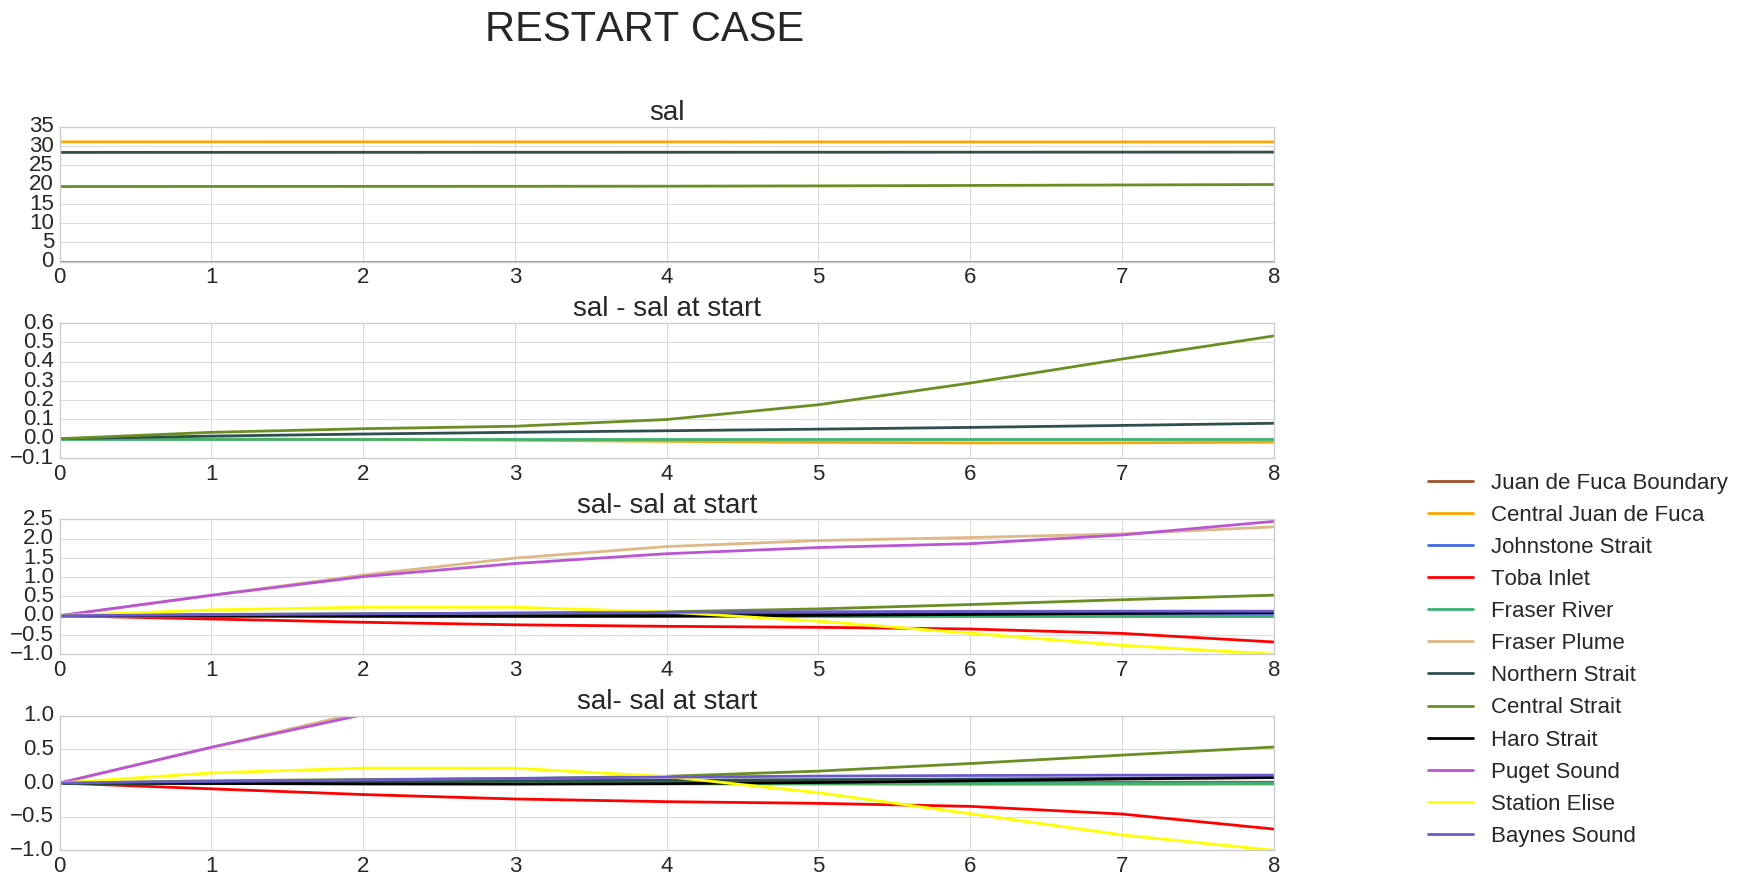

In [51]:
fig = plt.figure(figsize=(13,9))

nop = 4
for i in range(1,nop+1):
    ax = fig.add_subplot(nop,1,i)

    if i == 1:
        print('')
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tsal = sal[:,1,ty+10,tx+10]
                ax.plot(tsal,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
#             plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('sal', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
    
    if i == 2:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tsal = sal[:,1,ty+10,tx+10]
                tsal_s = sal[0,1,ty+10,tx+10]
                ax.plot(tsal-tsal_s,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            #plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('sal - sal at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            
    if i == 3:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            #if (i == 6) | (i == 7) | (i == 1) | (i == 4):
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tsal = sal[:,1,ty+10,tx+10]
            tsal_s = sal[0,1,ty+10,tx+10]
            ax.plot(tsal-tsal_s,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            #plt.ylim([0.01005,0.0101])
            #plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('sal- sal at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            
    if i == 4:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            #if (i == 6) | (i == 7) | (i == 1) | (i == 4):
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tsal = sal[:,1,ty+10,tx+10]
            tsal_s = sal[0,1,ty+10,tx+10]
            ax.plot(tsal-tsal_s,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.ylim([-1,1])
            #plt.ylim([0.01005,0.0101])
            plt.legend(bbox_to_anchor=(1.39, 2.95), fontsize = 16)
            plt.title('sal- sal at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

fig.suptitle('RESTART CASE',fontsize = 30)
fig.tight_layout()
plt.subplots_adjust(top=0.85)
  # otherwise the right y-label is slightly clipped
plt.show()

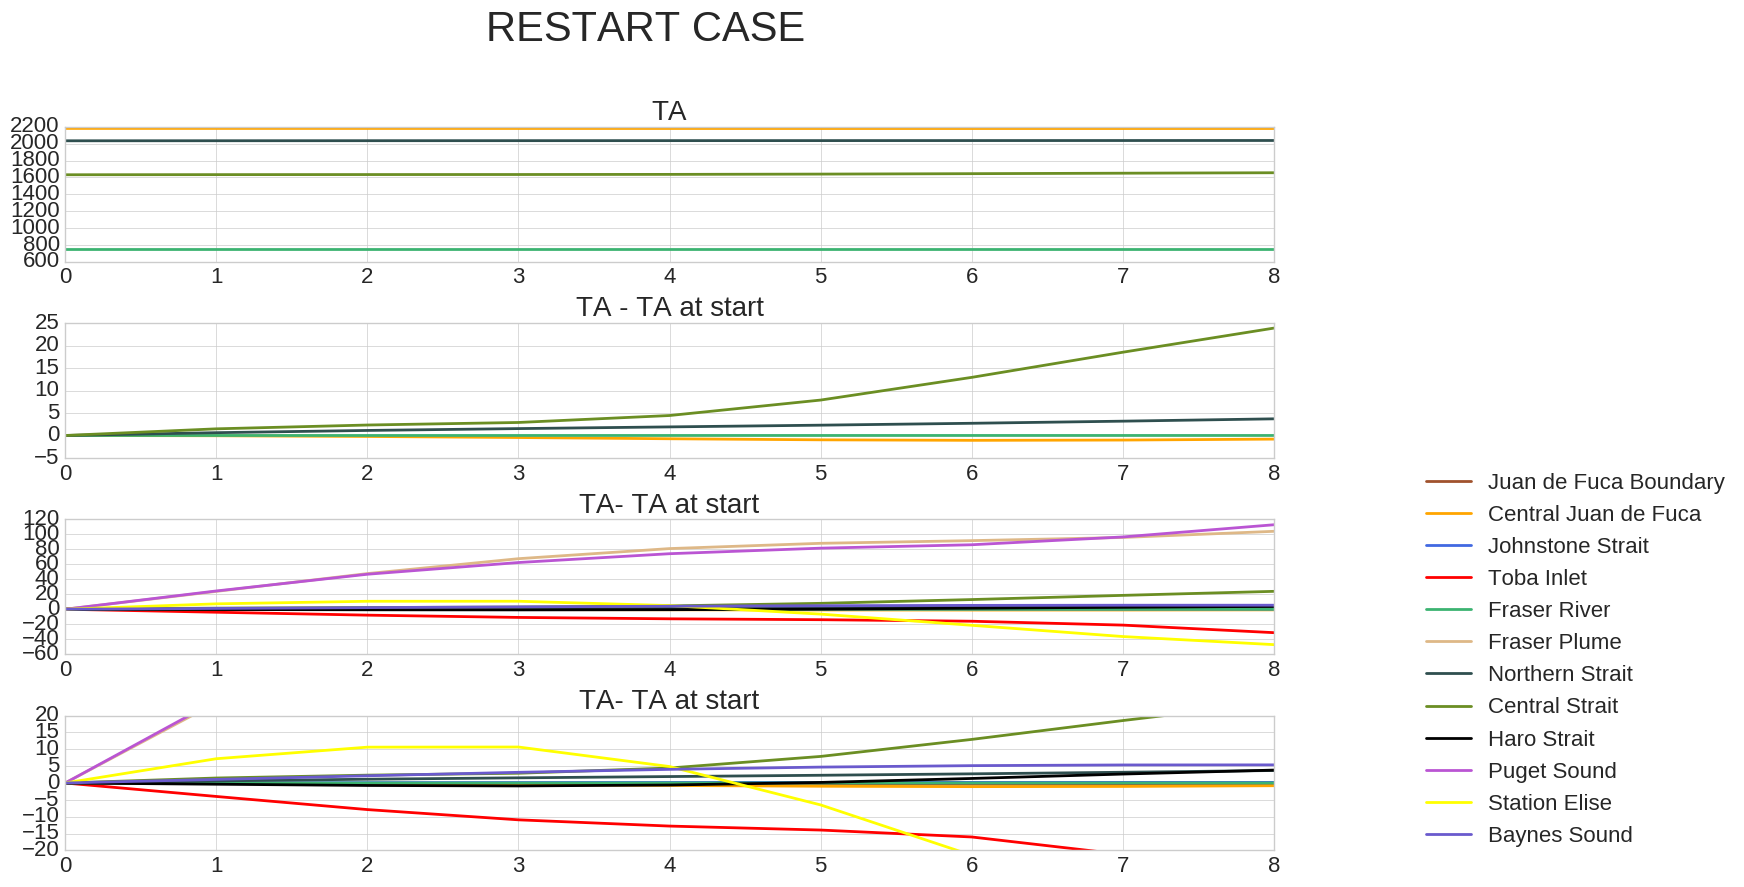

In [52]:
fig = plt.figure(figsize=(13,9))

nop = 4
for i in range(1,nop+1):
    ax = fig.add_subplot(nop,1,i)

    if i == 1:
        print('')
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tta = ta[:,1,ty+10,tx+10]
                ax.plot(tta,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
#             plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('TA', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
    
    if i == 2:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            if (i == 6) | (i == 7) | (i == 1) | (i == 4):
                tx = (cs.STATIONS[st]['x'])
                ty = (cs.STATIONS[st]['y'])
                col = cs.STATIONS[st]['color']
                lab = cs.STATIONS[st]['fullname']
                tta = ta[:,1,ty+10,tx+10]
                tta_s = ta[0,1,ty+10,tx+10]
                ax.plot(tta-tta_s,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            #plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('TA - TA at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            
    if i == 3:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            #if (i == 6) | (i == 7) | (i == 1) | (i == 4):
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tta = ta[:,1,ty+10,tx+10]
            tta_s = ta[0,1,ty+10,tx+10]
            ax.plot(tta-tta_s,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            #plt.ylim([0.01005,0.0101])
            #plt.legend(bbox_to_anchor=(1.29, 0.95), fontsize = 16)
            plt.title('TA- TA at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            
    if i == 4:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            #if (i == 6) | (i == 7) | (i == 1) | (i == 4):
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tta = ta[:,1,ty+10,tx+10]
            tta_s = ta[0,1,ty+10,tx+10]
            ax.plot(tta-tta_s,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.ylim([-20,20])
            #plt.ylim([0.01005,0.0101])
            plt.legend(bbox_to_anchor=(1.39, 2.95), fontsize = 16)
            plt.title('TA- TA at start', fontsize = 20)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

fig.suptitle('RESTART CASE',fontsize = 30)
fig.tight_layout()
plt.subplots_adjust(top=0.85)
  # otherwise the right y-label is slightly clipped
plt.show()

## Flux, DIC differences, base case

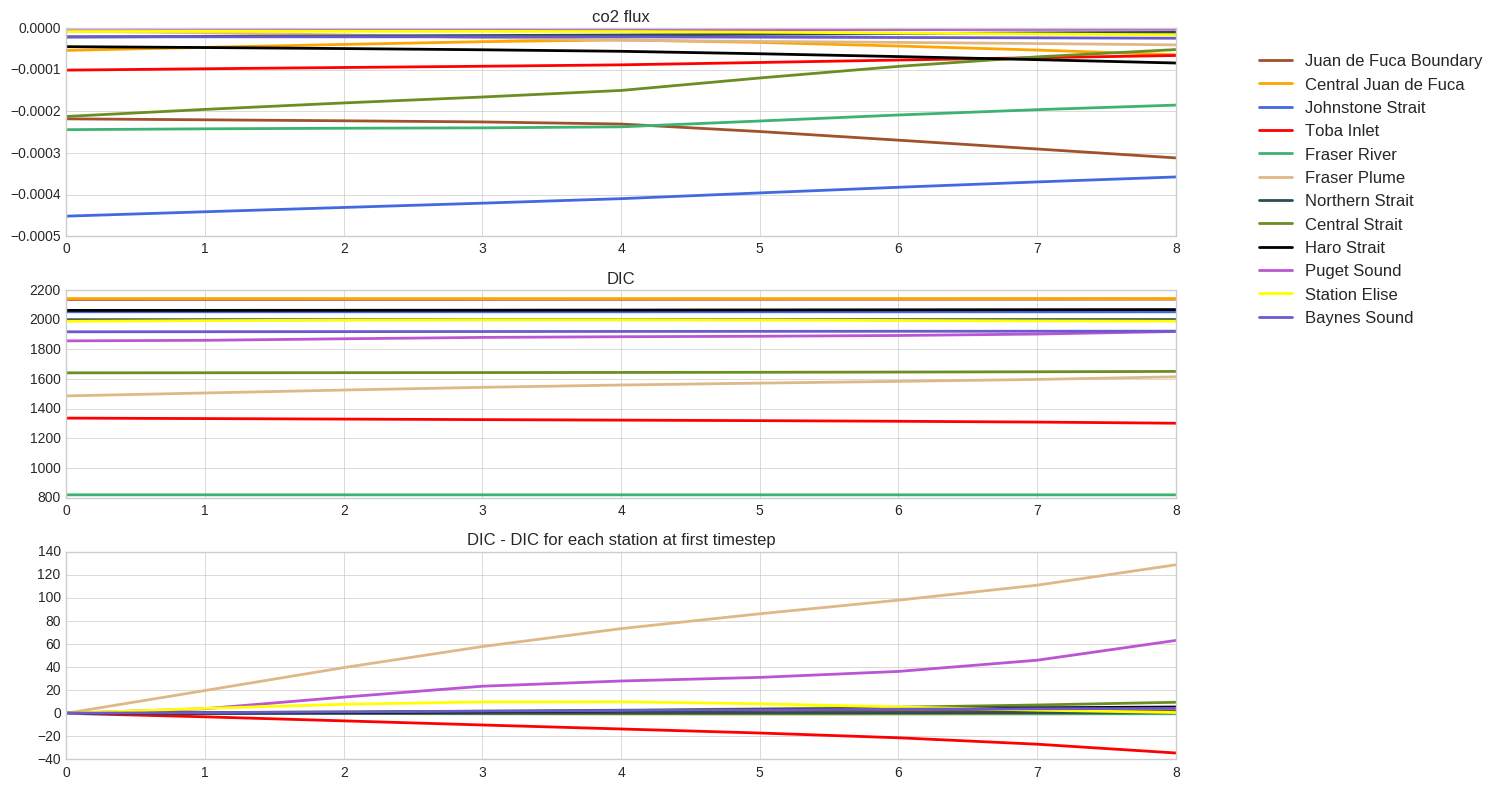

In [53]:

fig = plt.figure(figsize=(12,8))

for i in range(1,4):
    ax = fig.add_subplot(3,1,i)
    plt.xlim([0,93])

    if i == 1:
        print('')
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tflco2 = flco2[:,ty+10,tx+10]
            tflco2_nw = flco2[:,ty+10,tx+10]
            tdic = dic[:,0,ty+10,tx+10]
            #ax.plot(tflco2,col,label=lab,linewidth=2, linestyle='-')
            #ax.plot(tflco2_nw,col,label=lab,linewidth=2, linestyle=':')
            ax.plot(tflco2,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.legend(bbox_to_anchor=(1.29, 0.95))
            plt.title('co2 flux')
#             #plt.ylim([1200,2200])
    
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    if i == 2:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tflco2 = flco2[:,ty+10,tx+10]
            tdic = dic[:,0,ty+10,tx+10]
            ax.plot(tdic,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.title('DIC')
            
    if i == 3:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tflco2 = flco2[:,ty+10,tx+10]
            basdic = dic[0,0,ty+10,tx+10]
            tdic = dic[:,0,ty+10,tx+10]
            ax.plot(tdic-basdic,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.title('DIC - DIC for each station at first timestep')
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## KOMPLOT

In [54]:
dic = nc_c.variables['dissolved_inorganic_carbon']
udic = nc_c.variables['uptake_DIC']
uuc = nc_c.variables['uptake_UC']
flco2 = nc_c.variables['co2_flux_mmol_m2_s']


nit = nc_p.variables['nitrate']
ammo = nc_p.variables['ammonium']
diat = nc_p.variables['diatoms']
flag = nc_p.variables['flagellates']
cili = nc_p.variables['ciliates']



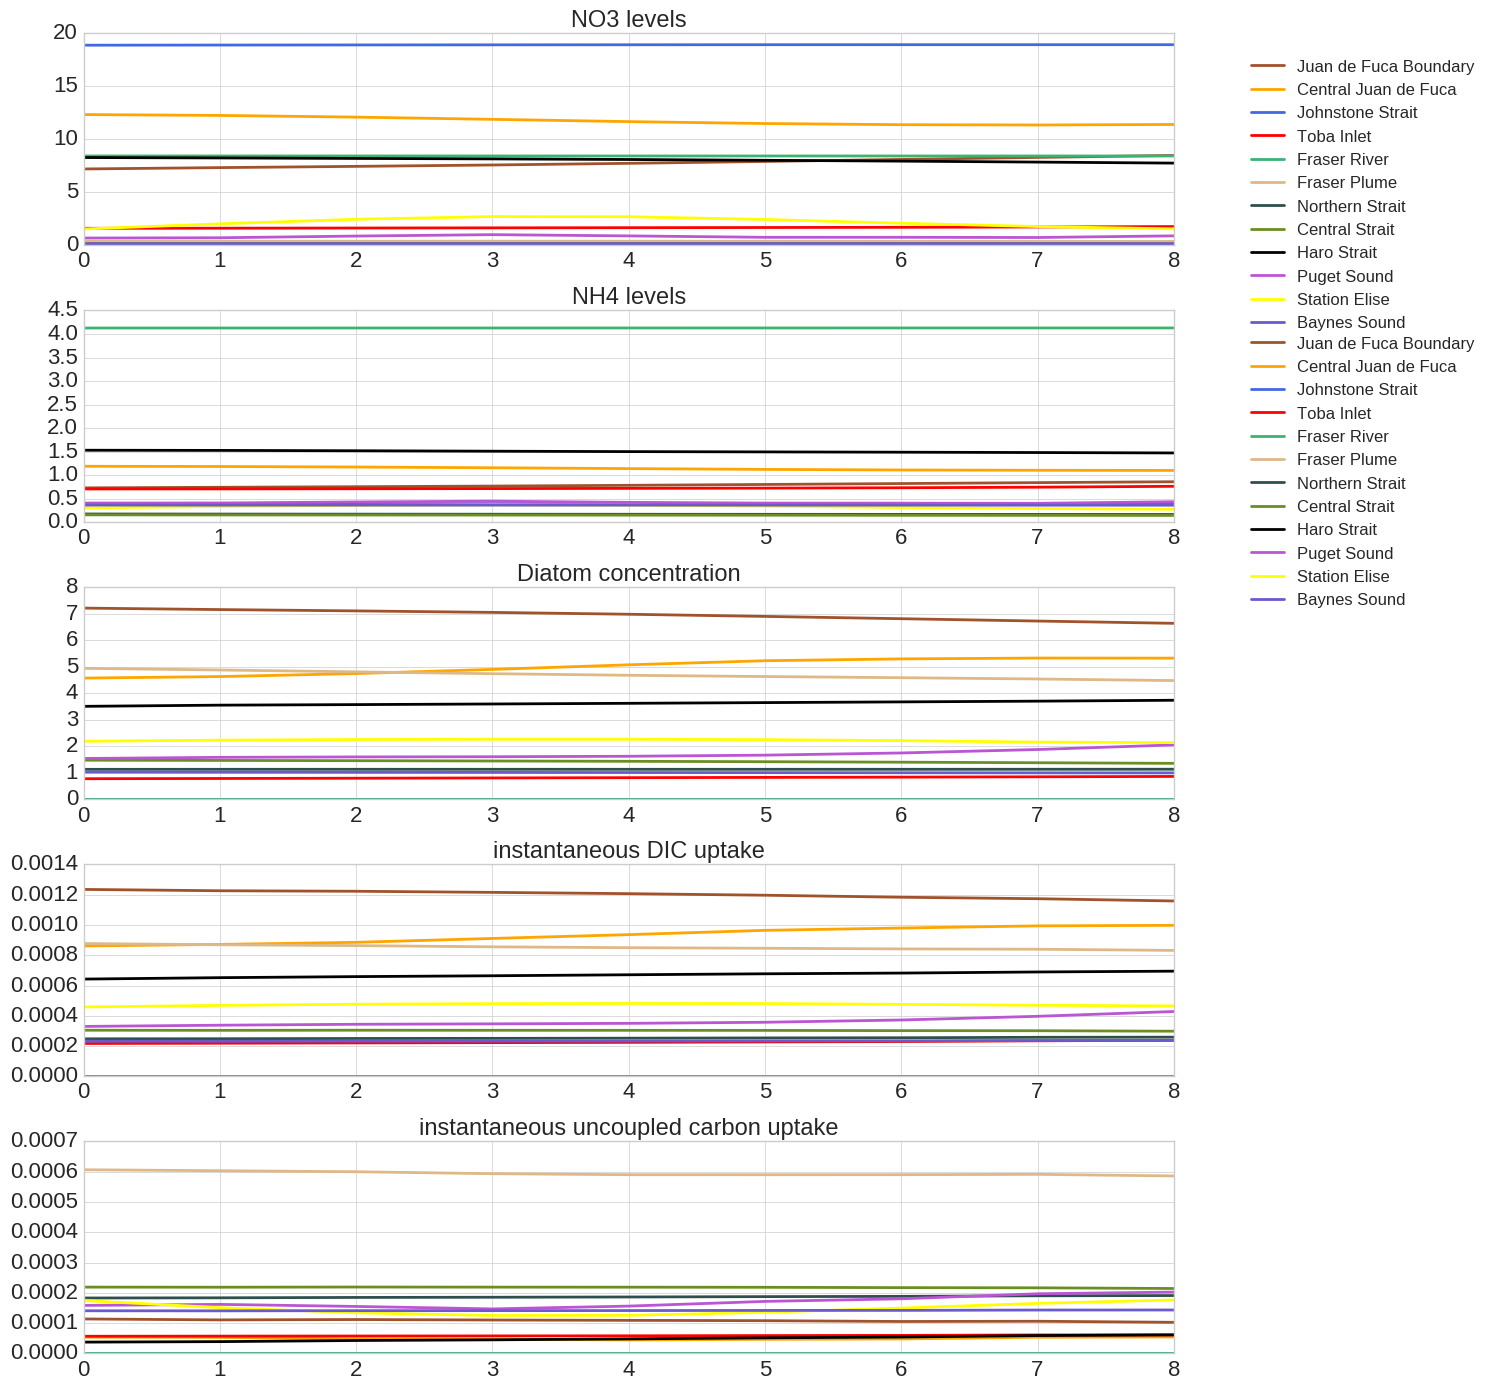

In [55]:
fig = plt.figure(figsize=(12,14))
nop = 5

for i in range(1,nop+1):
    ax = fig.add_subplot(nop,1,i)
    
    if i == 1:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tnit = nit[:,0,ty+10,tx+10]
            ax.plot(tnit,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.legend(bbox_to_anchor=(1.29, 0.95))
            plt.title('NO3 levels', fontsize = 17)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

    if i == 2:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tammo = ammo[:,0,ty+10,tx+10]
            ax.plot(tammo,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.legend(bbox_to_anchor=(1.29, 0.95))
            plt.title('NH4 levels', fontsize = 17)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
        
    if i == 3:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tdiat = diat[:,0,ty+10,tx+10]
            ax.plot(tdiat,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.title('Diatom concentration', fontsize = 17)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            
    if i == 4:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tuptd = udic[:,0,ty+10,tx+10]
            tuptu = uuc[:,0,ty+10,tx+10]
            ax.plot(tuptd,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.title('instantaneous DIC uptake', fontsize = 17)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

    if i ==5:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tuptd = udic[:,0,ty+10,tx+10]
            tuptu = uuc[:,0,ty+10,tx+10]
            ax.plot(tuptu,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.title('instantaneous uncoupled carbon uptake', fontsize = 17)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [56]:
for i in range(0, len(tstat)):
    st = (tstat[i])
    
    tx = (cs.STATIONS[st]['x'])
    ty = (cs.STATIONS[st]['y'])
    col = cs.STATIONS[st]['color']
    lab = cs.STATIONS[st]['fullname']
    tflco2 = flco2[:,ty+10,tx+10]
#     print(np.min(tflco2))
#     print(np.max(tflco2))
    tstr = (st) + ': min_flux = '+str((np.min(tflco2)))+', max_flux = '+str((np.max(tflco2)))
    print(tstr)

JDFB: min_flux = -0.000311819, max_flux = -0.000217851
JDFC: min_flux = -6.3591e-05, max_flux = -2.79101e-05
JS: min_flux = -0.000451934, max_flux = -0.000357604
TI: min_flux = -0.000100572, max_flux = -6.53355e-05
FR: min_flux = -0.00024384, max_flux = -0.00018472
FP: min_flux = -3.98371e-05, max_flux = -6.8505e-06
NS: min_flux = -2.07965e-05, max_flux = -9.65409e-06
CS: min_flux = -0.000212057, max_flux = -5.10924e-05
HS: min_flux = -8.34369e-05, max_flux = -4.41073e-05
PS: min_flux = -5.80524e-06, max_flux = -2.28823e-06
SE: min_flux = -1.56432e-05, max_flux = -7.1504e-06
BS: min_flux = -2.38341e-05, max_flux = -2.04009e-05


In [57]:
print(flco2)

<class 'netCDF4._netCDF4.Variable'>
float32 co2_flux_mmol_m2_s(time_counter, y, x)
    standard_name: f
    long_name: f_co2flux
    units: fill
    online_operation: average
    interval_operation: 40 s
    interval_write: 400 s
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (9, 898, 398)
filling on
